In [8]:
import os

path = os.getcwd()

# animals klasörünüzün ana yolu
dataset_path = '/Users/sonerbasak/Desktop/Codes/ML-DS-Projects/aygaz-goruntu-isleme-bootcamp/animals/'  

target_classes = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", 
                  "sheep", "squirrel", "giant+panda", "polar+bear"]

output_path = "processed_animals"

# İşlenmiş veri klasörü
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [9]:
import cv2
import numpy as np
# Hedef sınıfları işle
for class_name in target_classes:
    class_path = os.path.join(dataset_path, class_name)
    print(class_path)
    output_class_path = os.path.join(output_path, class_name)
    
    if not os.path.exists(class_path):
        print(f"Warning: {class_name} klasörü bulunamadı. İşlem atlanıyor.")
        continue

    # Hedef klasör oluştur
    if not os.path.exists(output_class_path):
        os.makedirs(output_class_path)

    # Sınıfın tüm resim dosyalarını listele
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    selected_images = image_files[:650]  # İlk 650 resmi seçiyoruz

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(class_path, image_file)

        # Görüntüyü oku
        try:
            img = cv2.imread(image_path)
            if img is None:
                print(f"Warning: {image_path} okunamadı. Atlanıyor.")
                continue

            # Yeniden boyutlandırma ve normalizasyon
            img_resized = cv2.resize(img, (128,128))
            img_normalized = img_resized / 255.0

            output_image_path = os.path.join(output_class_path, f"{i+1:03d}.jpg")
            cv2.imwrite(output_image_path, (img_normalized * 255).astype(np.uint8))

        except Exception as e:
            print(f"Error processing {image_path}: {e}")

print("Hedef sınıflar başarıyla işlendi. Diğer klasörler olduğu gibi bırakıldı.")

/Users/sonerbasak/Desktop/Codes/ML-DS-Projects/aygaz-goruntu-isleme-bootcamp/animals/collie
/Users/sonerbasak/Desktop/Codes/ML-DS-Projects/aygaz-goruntu-isleme-bootcamp/animals/dolphin
/Users/sonerbasak/Desktop/Codes/ML-DS-Projects/aygaz-goruntu-isleme-bootcamp/animals/elephant
/Users/sonerbasak/Desktop/Codes/ML-DS-Projects/aygaz-goruntu-isleme-bootcamp/animals/fox
/Users/sonerbasak/Desktop/Codes/ML-DS-Projects/aygaz-goruntu-isleme-bootcamp/animals/moose
/Users/sonerbasak/Desktop/Codes/ML-DS-Projects/aygaz-goruntu-isleme-bootcamp/animals/rabbit
/Users/sonerbasak/Desktop/Codes/ML-DS-Projects/aygaz-goruntu-isleme-bootcamp/animals/sheep
/Users/sonerbasak/Desktop/Codes/ML-DS-Projects/aygaz-goruntu-isleme-bootcamp/animals/squirrel
/Users/sonerbasak/Desktop/Codes/ML-DS-Projects/aygaz-goruntu-isleme-bootcamp/animals/giant+panda
/Users/sonerbasak/Desktop/Codes/ML-DS-Projects/aygaz-goruntu-isleme-bootcamp/animals/polar+bear
Hedef sınıflar başarıyla işlendi. Diğer klasörler olduğu gibi bırakıldı

In [10]:
from sklearn.model_selection import train_test_split

dataset_path = "processed_animals"  # İşlenmiş verilerin bulunduğu klasör

X = []  # Resimler
y = []  # Etiketler

for class_index, class_name in enumerate(target_classes):
    class_path = os.path.join(dataset_path, class_name)
    
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        
        # Görüntüyü oku
        img = cv2.imread(image_path)
        
        if img is not None:
            # Görüntüyü yeniden boyutlandır ve normalize et
            img_resized = cv2.resize(img, (128,128))
            img_normalized = img_resized / 255.0
            
            X.append(img_normalized)  # Resmi ekle
            y.append(class_index)  # Etiketi ekle (class_index, yani sınıfın indeksi)

# Numpy dizilerine dönüştür
X = np.array(X)
y = np.array(y)

# Eğitim ve test verilerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi kontrol et
print(f"Eğitim verisi boyutu: {X_train.shape}")
print(f"Test verisi boyutu: {X_test.shape}")

Eğitim verisi boyutu: (4550, 128, 128, 3)
Test verisi boyutu: (1950, 128, 128, 3)


In [11]:
# CNN Modeli
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # İlk konvolüsyonel katman
model.add(layers.MaxPooling2D((2, 2)))  # Havuzlama katmanı

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())  # 2D'yi 1D'ye dönüştür
model.add(layers.Dense(512, activation='relu'))  # Tam bağlı katman

model.add(layers.Dropout(0.5))  # %50 dropout

model.add(layers.Dense(10, activation='softmax'))

# Model özeti
model.summary()

# Modeli derleme
model.compile(
    optimizer='adam',               # Optimizasyon algoritması
    loss='sparse_categorical_crossentropy', # Kayıp fonksiyonu
    metrics=['accuracy']            # Değerlendirme metriği
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 512)               2

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri artırma (Data Augmentation)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Eğitim ve doğrulama jeneratörleri
train_generator = datagen.flow(X_train, y_train, batch_size=32)
validation_generator = datagen.flow(X_test, y_test, batch_size=32)

# steps_per_epoch ve validation_steps hesaplama
steps_per_epoch = len(X_train) // 32
validation_steps = len(X_test) // 32

# Modeli eğitme
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

Epoch 1/20
142/142 [==============================] - 28s 197ms/step - loss: 2.0692 - accuracy: 0.2882 - val_loss: 1.6964 - val_accuracy: 0.4047
Epoch 2/20
142/142 [==============================] - 27s 192ms/step - loss: 1.6879 - accuracy: 0.4177 - val_loss: 1.5584 - val_accuracy: 0.4583
Epoch 3/20
142/142 [==============================] - 28s 196ms/step - loss: 1.5386 - accuracy: 0.4564 - val_loss: 1.4329 - val_accuracy: 0.5073
Epoch 4/20
142/142 [==============================] - 29s 202ms/step - loss: 1.4008 - accuracy: 0.5148 - val_loss: 1.4065 - val_accuracy: 0.5177
Epoch 5/20
142/142 [==============================] - 28s 199ms/step - loss: 1.3370 - accuracy: 0.5370 - val_loss: 1.3290 - val_accuracy: 0.5526
Epoch 6/20
142/142 [==============================] - 28s 200ms/step - loss: 1.3122 - accuracy: 0.5527 - val_loss: 1.2581 - val_accuracy: 0.5714
Epoch 7/20
142/142 [==============================] - 28s 194ms/step - loss: 1.2554 - accuracy: 0.5699 - val_loss: 1.2150 - val_ac

61/61 [==============================] - 3s 45ms/step - loss: 0.9648 - accuracy: 0.6728
Test kaybı (Loss): 0.9648128747940063
Test doğruluğu (Accuracy): 67.28%


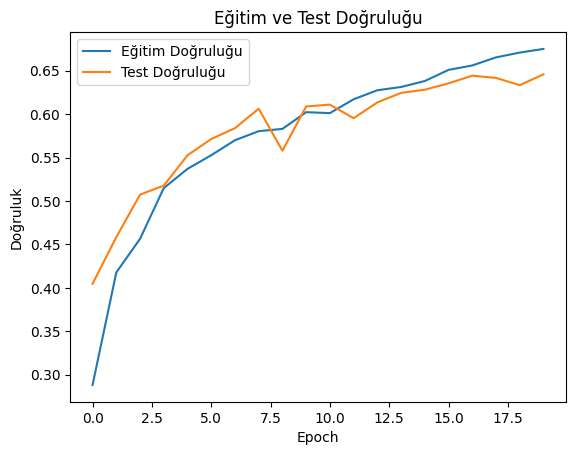

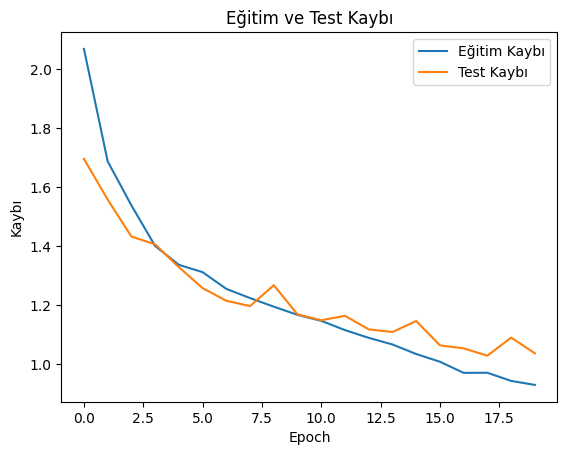

In [29]:
import matplotlib.pyplot as plt

# Modeli test verisi ile değerlendirme
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Test sonucu
print(f"Test kaybı (Loss): {test_loss}")
print(f"Test doğruluğu (Accuracy): {test_accuracy * 100:.2f}%")

# Eğitim ve doğrulama doğruluğu (accuracy) grafiklerini çizme
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Test Doğruluğu')
plt.title('Eğitim ve Test Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Eğitim ve doğrulama kaybı (loss) grafiklerini çizme
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Test Kaybı')
plt.title('Eğitim ve Test Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()

In [30]:
from utils import get_light_sources,manipulate_light_source

def get_manipulated_images(images, labels, save_path="manipulated_images"):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    manipulated_images = []
    manipulated_labels = []

    # Get the light sources
    purplish_light, yellowish_light, greenish_light = get_light_sources()

    for i, (image, label) in enumerate(zip(images, labels)):
        # Manipulate the image under different light sources
        manipulated_purplish = manipulate_light_source(image, purplish_light)
        manipulated_yellowish = manipulate_light_source(image, yellowish_light)
        manipulated_greenish = manipulate_light_source(image, greenish_light)

        # Save the manipulated images
        cv2.imwrite(f'{save_path}/manipulated_purplish_{i}.jpg', cv2.cvtColor((manipulated_purplish*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
        cv2.imwrite(f'{save_path}/manipulated_yellowish_{i}.jpg', cv2.cvtColor((manipulated_yellowish*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
        cv2.imwrite(f'{save_path}/manipulated_greenish_{i}.jpg', cv2.cvtColor((manipulated_greenish*255).astype(np.uint8), cv2.COLOR_RGB2BGR))

        # Append manipulated images to list
        manipulated_images.extend([manipulated_purplish, manipulated_yellowish, manipulated_greenish])

        # Append the corresponding label for each manipulated image
        manipulated_labels.extend([label, label, label])
    
    return np.array(manipulated_images), np.array(manipulated_labels)

183/183 [==============================] - 8s 43ms/step - loss: 5.5713 - accuracy: 0.1896
Manipüle Edilmiş Test Kaybı (Loss): 5.57134485244751
Manipüle Edilmiş Test Doğruluğu (Accuracy): 18.96%


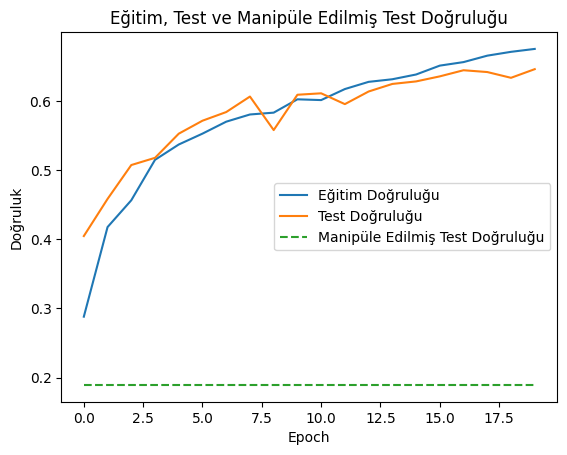

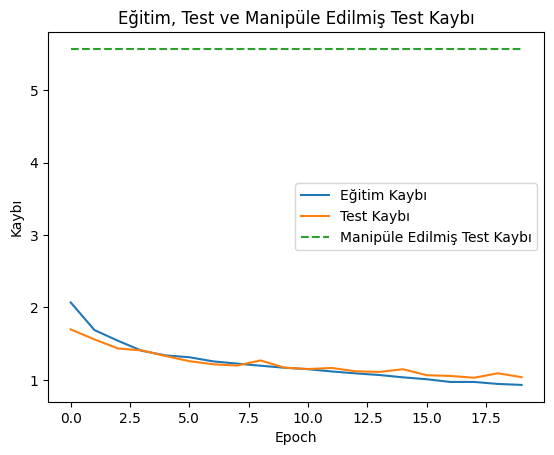

In [32]:
# Test setini manipüle etme
manipulated_X_test, manipulated_Y_test = get_manipulated_images(X_test,y_test)

# Manipüle edilmiş test seti ile modeli değerlendirme
test_loss, test_accuracy = model.evaluate(manipulated_X_test, manipulated_Y_test)

# Test sonucu
print(f"Manipüle Edilmiş Test Kaybı (Loss): {test_loss}")
print(f"Manipüle Edilmiş Test Doğruluğu (Accuracy): {test_accuracy * 100:.2f}%")

# Manipüle edilmiş test setinin doğruluğunu ve kaybını ayrı olarak çizme
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Test Doğruluğu')
plt.plot([test_accuracy]*len(history.history['accuracy']), label='Manipüle Edilmiş Test Doğruluğu', linestyle='--')
plt.title('Eğitim, Test ve Manipüle Edilmiş Test Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Manipüle edilmiş test kaybını çizme
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Test Kaybı')
plt.plot([test_loss]*len(history.history['loss']), label='Manipüle Edilmiş Test Kaybı', linestyle='--')
plt.title('Eğitim, Test ve Manipüle Edilmiş Test Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()

In [38]:
from utils import process_and_white_balance

def get_wb_images(images, labels, save_path="get_wb_images"):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    get_wb_images = []
    get_wb_labels = []

    for i, (image, label) in enumerate(zip(images, labels)):
        srgb_grey_world = process_and_white_balance(image)

        # Manipüle edilmiş görselleri kaydet
        cv2.imwrite(f'{save_path}/get_wb_{i}.jpg', cv2.cvtColor((srgb_grey_world*255).astype(np.uint8), cv2.COLOR_RGB2BGR))

        get_wb_images.append(srgb_grey_world)
        get_wb_labels.append(label) 
    
    return np.array(get_wb_images), np.array(get_wb_labels)

/Users/sonerbasak/Desktop/Codes/ML-DS-Projects/aygaz-goruntu-isleme-bootcamp/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sonerbasak/Desktop/Codes/ML-DS-Projects/aygaz-goruntu-isleme-bootcamp/venv/lib/python3.8/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/var/folders/ch/wbx63l85797byyr2s8y4rlkm0000gn/T/ipykernel_56309/1539814643.py:14: RuntimeWarning: invalid value encountered in cast
  cv2.imwrite(f'{save_path}/get_wb_{i}.jpg', cv2.cvtColor((srgb_grey_world*255).astype(np.uint8), cv2.COLOR_RGB2BGR))


183/183 [==============================] - 9s 46ms/step - loss: nan - accuracy: 0.6499
Manipüle Edilmiş Test Kaybı (Loss): nan
Manipüle Edilmiş Test Doğruluğu (Accuracy): 64.99%


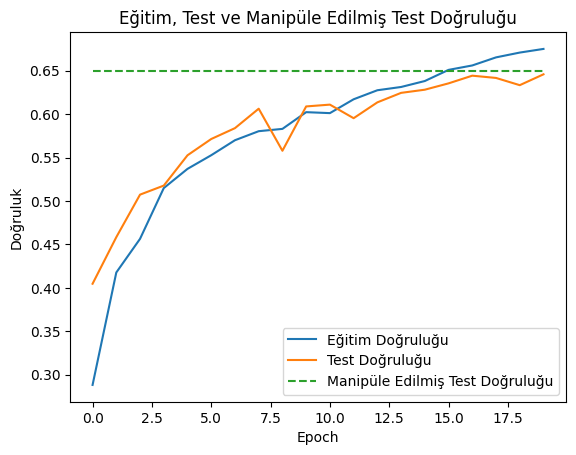

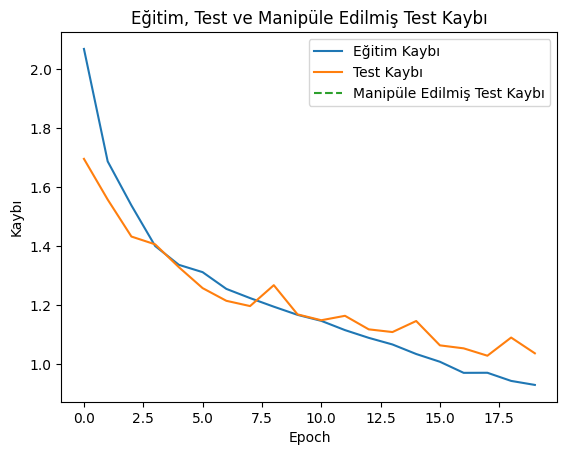

In [39]:
# Test setini manipüle etme
get_wb_X_test, get_wb_Y_test = get_wb_images(manipulated_X_test,manipulated_Y_test)

# Manipüle edilmiş test seti ile modeli değerlendirme
test_loss, test_accuracy = model.evaluate(get_wb_X_test, get_wb_Y_test)

# Test sonucu
print(f"Manipüle Edilmiş Test Kaybı (Loss): {test_loss}")
print(f"Manipüle Edilmiş Test Doğruluğu (Accuracy): {test_accuracy * 100:.2f}%")

# Manipüle edilmiş test setinin doğruluğunu ve kaybını ayrı olarak çizme
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Test Doğruluğu')
plt.plot([test_accuracy]*len(history.history['accuracy']), label='Manipüle Edilmiş Test Doğruluğu', linestyle='--')
plt.title('Eğitim, Test ve Manipüle Edilmiş Test Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Manipüle edilmiş test kaybını çizme
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Test Kaybı')
plt.plot([test_loss]*len(history.history['loss']), label='Manipüle Edilmiş Test Kaybı', linestyle='--')
plt.title('Eğitim, Test ve Manipüle Edilmiş Test Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()